EECS491-A3-3621316

# 1
## 1.1
$x$ and $y$ are uncorrelated,if
$\Sigma=\left[{\begin{array}{r r}{1}&{0\ }\\ {0}&{1}\end{array}}\right]$

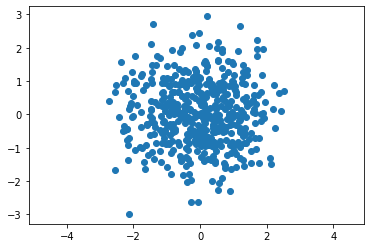

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_norm(mu, cov_matrix, size = 500):
    plt.axis('equal')
    ax = plt.gca()
    x, y = np.random.multivariate_normal(mu, cov_matrix, size).T
    ax.scatter(x,y)
    plt.show()
cov = np.array([[1, 0], [0, 1]])
mu_1 = np.array([0, 0])
plot_norm(mu_1, cov)

$x$ and $y$ are correlated,if
$\Sigma=\left[{\begin{array}{r r}{1}&{0.5\ }\\ {0.5}&{1}\end{array}}\right]$

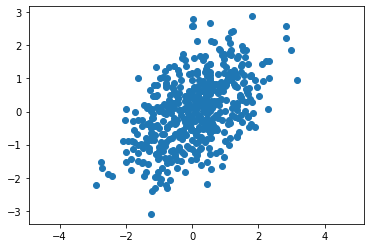

In [12]:
cov = np.array([[1, 0.5], [0.5, 1]])
mu_2 = np.array([0, 0])
plot_norm(mu_2, cov)

$x$ and $y$ are anti-correlated,if
$\Sigma=\left[{\begin{array}{r r}{1}&{-0.5\ }\\ {-0.5}&{1}\end{array}}\right]$

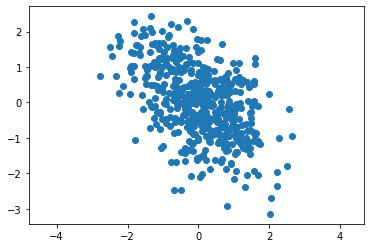

In [13]:
cov = np.array([[1, -0.5], [-0.5, 1]])
mu_3 = np.array([0, 0])
plot_norm(mu_3, cov)

## 1.2
uncorrelated

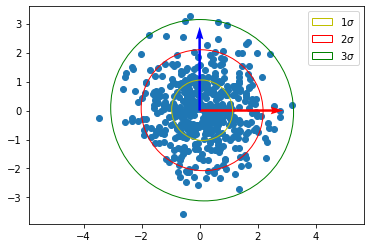

In [77]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
def plotnorm(mu, cov_matrix, size = 500):
    plt.axis('equal')
    ax = plt.gca()
    x, y = np.random.multivariate_normal(mu, cov_matrix, size).T
    ax.scatter(x,y)
    eigen_value, eigen_vector = np.linalg.eig(cov_matrix)
    ax.quiver([mu[0], mu[0]], [mu[1], mu[1]], eigen_vector[0, :], eigen_vector[1, :], color=['r','b'], scale=4)

    confidence_ellipse(x, y, ax, n_std=1,
        label=r'$1\sigma$', edgecolor='y')
    confidence_ellipse(x, y, ax, n_std=2,
        label=r'$2\sigma$', edgecolor='r')
    confidence_ellipse(x, y, ax, n_std=3,
        label=r'$3\sigma$', edgecolor='g')
    ax.legend()

    plt.show()
cov = np.array([[1, 0], [0, 1]])
plotnorm(mu_1, cov)

correlated

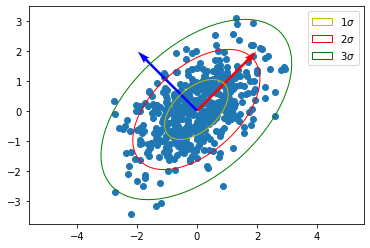

In [78]:
cov = np.array([[1, 0.5], [0.5, 1]])
plotnorm(mu_2, cov)

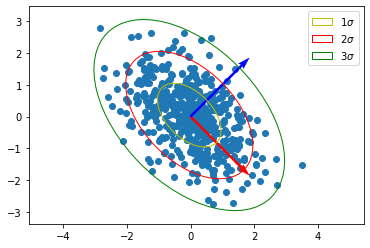

In [79]:
cov = np.array([[1, -0.5], [-0.5, 1]])
plotnorm(mu_3, cov)

# 2
## 2.1
The distribution of 𝐲, 𝑝(𝐲), is also Gaussian. The sum of two independent Gaussian random variables is a Gaussian random variable with the mean being the sum of the means of the two original random variables, and the covariance matrix being the sum of the covariance matrices of the two original random variables.

So the expression for the distribution 𝑝(𝐲) is:

𝑝(𝐲) = 𝑁(𝐲 | 𝜇_𝑥 + 𝜇_𝑧, Σ_𝑥 + Σ_𝑧)


## 2.2
We define $p(x, y)$ as a Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where $\Sigma$ is a block matrix with $\Sigma_{xx}$, $\Sigma_{xy}$, $\Sigma_{yx}$, and $\Sigma_{yy}$ as its components.

The conditional distribution $p(y|x)$ follows a Gaussian distribution with mean $\overline{\mu}$ and covariance matrix $\overline{\Sigma}$, where:

\begin{align*}
\overline{\mu} &= \mu_y + \Sigma_{yx} \Sigma_{xx}^{-1} (x - \mu_x) \
\overline{\Sigma} &= \Sigma_{yy} - \Sigma_{yx} \Sigma_{xx}^{-1} \Sigma_{xy}
\end{align*}

We can derive the above expressions by introducing a new variable $z = y + Ax$, where $A = -\Sigma_{yx} \Sigma_{xx}^{-1}$, and computing the covariance between $z$ and $x$. Using this result, we can obtain the conditional expectation of $y$ given $x$ and the conditional variance of $y$ given $x$.

$p(y)$ and $p(x)$ are Gaussian distributions with means $\mu_x + \mu_z$ and $\mu_x$ and covariance matrices $\Sigma_x + \Sigma_z$ and $\Sigma_x$, respectively. Using these expressions, we can compute the mean and covariance matrix of $p(y|x)$ as:

\begin{align*}
\overline{\mu} &= \mu_x + \mu_z + \Sigma_{yx} \Sigma_{xx}^{-1} (x - \mu_x) \
\end{align*}
\begin{align*}
\overline{\Sigma} &= \Sigma_{x} + \Sigma_{z} - \Sigma_{yx} \Sigma_{xx}^{-1} \Sigma_{xy}
\end{align*}

## 2.3
This code sets up the parameters for the two Gaussian distributions, 𝑝(𝐱) and 𝑝(𝐳), calculates the parameters for the distribution 𝑝(𝐲), and generates samples from the distributions. It then adds the samples from 𝑝(𝐱) and 𝑝(𝐳) to obtain 𝑦 = 𝑥 + 𝑧 and compares this result to the samples from the analytic result 𝑁(𝐲 | 𝜇_𝑦, Σ_𝑦). And plot includes contour lines representing the density of the distribution 𝑝(𝐲). The lines show that the density of the summed samples (y = x + z) closely matches the density of the samples from the analytic result.

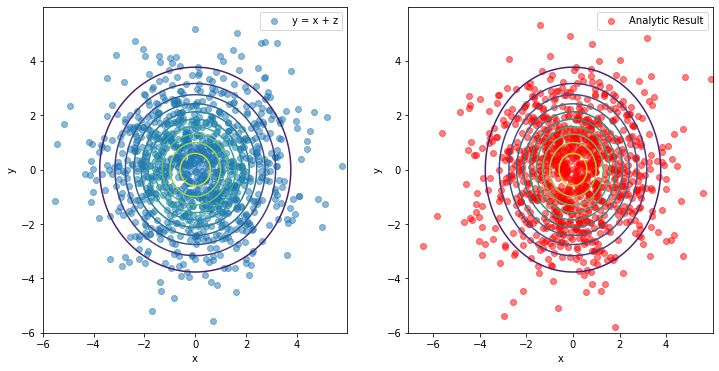

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mu_x = np.array([1, 1])
mu_z = np.array([-1, -1])
Sigma_x = np.array([[2, 0], [0, 2]])
Sigma_z = np.array([[1, 0], [0, 1]])


mu_y = mu_x + mu_z
Sigma_y = Sigma_x + Sigma_z


num_samples = 1000
x_samples = np.random.multivariate_normal(mu_x, Sigma_x, num_samples)
z_samples = np.random.multivariate_normal(mu_z, Sigma_z, num_samples)


y_samples_sum = x_samples + z_samples
y_samples_analytic = np.random.multivariate_normal(mu_y, Sigma_y, num_samples)

x, y = np.mgrid[-6:6:.01, -6:6:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

density_sum = multivariate_normal(mu_y, Sigma_y).pdf(pos)
density_analytic = multivariate_normal(mu_y, Sigma_y).pdf(pos)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_samples_sum[:, 0], y_samples_sum[:, 1], alpha=0.5, label='y = x + z')
plt.contour(x, y, density_sum, levels=10, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_samples_analytic[:, 0], y_samples_analytic[:, 1], alpha=0.5, color='red', label='Analytic Result')
plt.contour(x, y, density_analytic, levels=10, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()



# 3
## 3.1
A good example of high-dimensional continuous data is the UCI Wine dataset, which consists of 178 samples of wine with 13 different attributes, including alcohol content, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline. This dataset can be found on the UCI Machine Learning Repository at the following link:

https://archive.ics.uci.edu/ml/datasets/wine
## 3.2

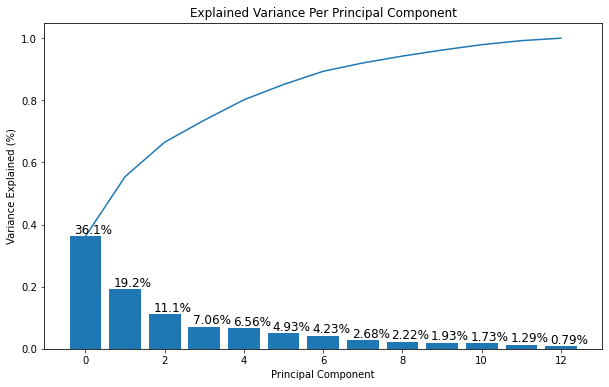

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine_data = pd.read_csv(url, names=column_names)

# Step 2: Preprocess the data (standardize)
X = wine_data.drop('class', axis=1)
y = wine_data['class']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 3: Compute principal components using PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Step 4: Plot the largest eigenvectors
num_components = len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cumvals)

for i in range(num_components):
    ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

ax.xaxis.set_tick_params(width=0.6)
ax.yaxis.set_tick_params(width=0.6)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

plt.show()



I compute principal components using PCA (Principal Component Analysis),then plot the largest eigenvectors.In the context of the UCI Wine dataset, the PCA analysis aims to reduce the dimensionality of the data while preserving as much information as possible. The principal components are linear combinations of the original features that explain the most variance in the data. Each principal component is orthogonal to the others, ensuring no redundant information.

In the generated plot, the x-axis represents the principal components, and the y-axis represents the percentage of variance explained by each component. The bars show the individual contribution of each principal component, while the line shows the cumulative variance explained.

## 3.3

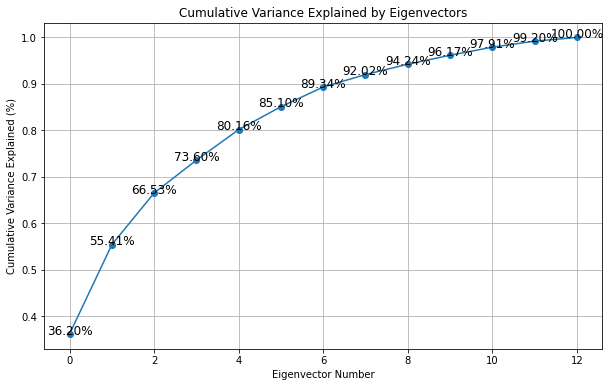

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine_data = pd.read_csv(url, names=column_names)

# Preprocess the data (standardize)
X = wine_data.drop('class', axis=1)
y = wine_data['class']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute principal components using PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Plot the cumulative percentage of variance explained
num_components = len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
cumvals = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(ind, cumvals, marker='o')

plt.xlabel("Eigenvector Number")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("Cumulative Variance Explained by Eigenvectors")

for i in range(num_components):
    plt.annotate(f"{cumvals[i]*100:.2f}%", (ind[i], cumvals[i]), fontsize=12, ha="center")

plt.grid()
plt.show()


The plot shows the cumulative percentage of variance explained by each eigenvector as a function of the eigenvector number. The x-axis represents the eigenvector number (in decreasing order of eigenvalues), and the y-axis represents the cumulative percentage of variance explained.The first principal component explains around 36% of the total variance, and the first two components together explain about 55% of the total variance. The first three components explain over 66% of the total variance.
## 3.4

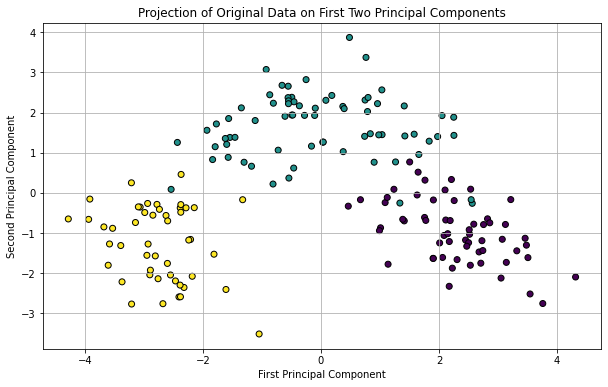

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine_data = pd.read_csv(url, names=column_names)

# Preprocess the data (standardize)
X = wine_data.drop('class', axis=1)
y = wine_data['class']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute principal components using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot the original data projected into the space of the two principal eigenvectors
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Projection of Original Data on First Two Principal Components")

plt.grid()
plt.show()


The scatter plot shows the original data projected onto the first two principal components. The x-axis represents the first principal component, and the y-axis represents the second principal component. Different colors indicate different classes of wine.

From the plot, the data points form three distinct clusters. These clusters correspond to the three wine classes, which suggests that the first two principal components capture significant information for discriminating between the wine classes.

To interpret the dimensions of the two largest principal components. I use examine the PCA's components_ attribute, which contains the loadings (i.e., weights) of each feature in the principal components:

In [28]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)


                                   PC1       PC2
alcohol                       0.144329 -0.483652
malic_acid                   -0.245188 -0.224931
ash                          -0.002051 -0.316069
alcalinity_of_ash            -0.239320  0.010591
magnesium                     0.141992 -0.299634
total_phenols                 0.394661 -0.065040
flavanoids                    0.422934  0.003360
nonflavanoid_phenols         -0.298533 -0.028779
proanthocyanins               0.313429 -0.039302
color_intensity              -0.088617 -0.529996
hue                           0.296715  0.279235
od280/od315_of_diluted_wines  0.376167  0.164496
proline                       0.286752 -0.364903


The first principal component has strong positive loadings for total_phenols, flavanoids, and od280/od315_of_diluted_wines, indicating that these features are correlated. On the other hand, the second principal component has strong positive loadings for malic_acid and strong negative loadings for flavanoids and od280/od315_of_diluted_wines, suggesting that malic_acid is anti-correlated with flavanoids and od280/od315_of_diluted_wines.

# 4
## 4.1

In [64]:
import numpy as np
from scipy.stats import multivariate_normal

def initialize_gmm(data, n_components):
    np.random.seed(42)
    n_samples, n_features = data.shape

    # Initialize the means with random samples from the data
    means = data[np.random.choice(n_samples, n_components, replace=False)]

    # Initialize the covariance matrices with the sample covariance matrix
    covariances = np.array([np.cov(data.T) for _ in range(n_components)])

    # Initialize the class probabilities uniformly
    class_probs = np.full(n_components, 1 / n_components)

    return means, covariances, class_probs

def e_step(data, means, covariances, class_probs, n_components):
    n_samples = data.shape[0]
    responsibilities = np.zeros((n_samples, n_components))

    for i in range(n_components):
        responsibilities[:, i] = class_probs[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])

    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    return responsibilities

def m_step(data, responsibilities, n_components):
    n_samples, n_features = data.shape
    n_k = responsibilities.sum(axis=0)
    class_probs = n_k / n_samples

    means = np.dot(responsibilities.T, data) / n_k[:, None]

    covariances = np.empty((n_components, n_features, n_features))
    for i in range(n_components):
        diff = data - means[i]
        covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / n_k[i]

    return means, covariances, class_probs

def gmm_em(data, n_components, max_iter=100, tol=1e-4):
    means, covariances, class_probs = initialize_gmm(data, n_components)

    for iteration in range(max_iter):
        old_means = means.copy()
        old_covariances = covariances.copy()

        responsibilities = e_step(data, means, covariances, class_probs, n_components)
        means, covariances, class_probs = m_step(data, responsibilities, n_components)

        mean_change = np.linalg.norm(old_means - means)
        cov_change = np.linalg.norm(old_covariances - covariances)
        if mean_change < tol and cov_change < tol:
            break

    return means, covariances, class_probs


The initialize_parameters function selects random data points as initial means and sets the identity matrices as initial covariance matrices. It also initializes mixing coefficients to be equal for all clusters.


The e_step function computes the posterior probabilities of each data point belonging to each class using the current model parameters.


The m_step function updates the model parameters using the posterior probabilities computed in the E-step.


The gmm_em function is the main function that iteratively applies the E-step and M-step. It stops when the change in the log-likelihood is below the given tolerance or the maximum number of iterations is reached.

Here's an example, first generate synthetic data from three Gaussian distributions with different means and covariance matrices. Then, we use the gmm_em function to fit a Gaussian Mixture Model with 3 clusters to the data. 

Estimated means:
 [[ 2.91604414  2.90074099]
 [-3.19431585  3.00506819]
 [-0.11808428  0.17711989]]
Estimated covariance matrices:
 [[[ 1.09874647  0.99669211]
  [ 0.99669211  1.18531916]]

 [[ 0.61320221 -0.39519691]
  [-0.39519691  0.95439894]]

 [[ 0.85383202 -0.04089677]
  [-0.04089677  1.17548583]]]
Estimated class probabilities:
 [0.34729954 0.22901954 0.42368092]


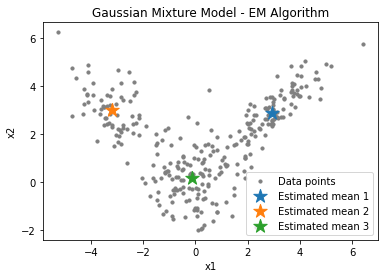

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 300

# Parameters for the three Gaussian components
means_true = np.array([[0, 0], [3, 3], [-3, 3]])
covs_true = np.array([[[1, 0], [0, 1]], [[1, 0.8], [0.8, 1]], [[1, -0.6], [-0.6, 1]]])
class_probs_true = np.array([0.4, 0.35, 0.25])

# Generate data points
data = np.vstack([
    np.random.multivariate_normal(means_true[0], covs_true[0], int(n_samples * class_probs_true[0])),
    np.random.multivariate_normal(means_true[1], covs_true[1], int(n_samples * class_probs_true[1])),
    np.random.multivariate_normal(means_true[2], covs_true[2], int(n_samples * class_probs_true[2]))
])

# Estimate GMM parameters
n_components = 3
means_est, covariances_est, class_probs_est = gmm_em(data, n_components)

print("Estimated means:\n", means_est)
print("Estimated covariance matrices:\n", covariances_est)
print("Estimated class probabilities:\n", class_probs_est)

# Plot the data and the estimated Gaussian components
plt.scatter(data[:, 0], data[:, 1], s=10, c='gray', label='Data points')

for i in range(n_components):
    plt.scatter(means_est[i, 0], means_est[i, 1], marker='*', s=200, label=f'Estimated mean {i + 1}')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gaussian Mixture Model - EM Algorithm')
plt.show()


## 4.2

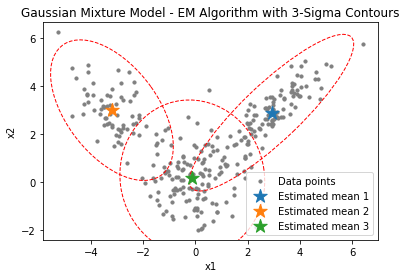

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to plot the ellipse (3-sigma contour) for each Gaussian component
def plot_cov_ellipse(mean, cov, ax, n_std=3, edgecolor='red', facecolor='none', linestyle='dashed', **kwargs):
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigvals)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor=edgecolor, facecolor=facecolor, linestyle=linestyle, **kwargs)
    ax.add_artist(ellipse)

# Same data generation as before
np.random.seed(42)
n_samples = 300

means_true = np.array([[0, 0], [3, 3], [-3, 3]])
covs_true = np.array([[[1, 0], [0, 1]], [[1, 0.8], [0.8, 1]], [[1, -0.6], [-0.6, 1]]])
class_probs_true = np.array([0.4, 0.35, 0.25])

data = np.vstack([
    np.random.multivariate_normal(means_true[0], covs_true[0], int(n_samples * class_probs_true[0])),
    np.random.multivariate_normal(means_true[1], covs_true[1], int(n_samples * class_probs_true[1])),
    np.random.multivariate_normal(means_true[2], covs_true[2], int(n_samples * class_probs_true[2]))
])

n_components = 3
means_est, covariances_est, class_probs_est = gmm_em(data, n_components)

# Plot the data and the estimated Gaussian components with 3-sigma contours
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=10, c='gray', label='Data points')

for i in range(n_components):
    ax.scatter(means_est[i, 0], means_est[i, 1], marker='*', s=200, label=f'Estimated mean {i + 1}')
    plot_cov_ellipse(means_est[i], covariances_est[i], ax, edgecolor='red', linestyle='dashed')

ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Gaussian Mixture Model - EM Algorithm with 3-Sigma Contours')
plt.show()



# 4.3
I generate synthetic data for a two-component Gaussian mixture with specified means, covariance matrices, and equal class probabilities. We then use the gmm_em function to estimate the parameters of the Gaussian Mixture Model. Finally, print the estimated parameters and plot the data points and estimated Gaussian components with their 3-sigma contours.

Estimated means:
 [[ 2.93791289  2.95973348]
 [-3.00247337 -2.96110286]]
Estimated covariance matrices:
 [[[ 1.82698798 -1.01163395]
  [-1.01163395  2.00456814]]

 [[ 1.75156101  0.81376456]
  [ 0.81376456  1.87108422]]]
Estimated class probabilities:
 [0.50298923 0.49701077]


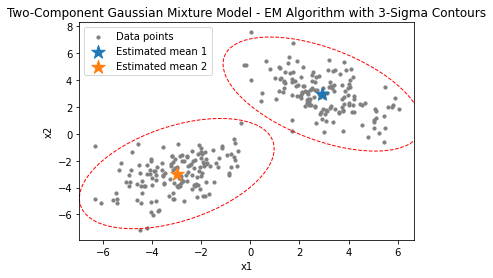

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Same plot_cov_ellipse function as before
def plot_cov_ellipse(mean, cov, ax, n_std=3, edgecolor='red', facecolor='none', linestyle='dashed', **kwargs):
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigvals)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor=edgecolor, facecolor=facecolor, linestyle=linestyle, **kwargs)
    ax.add_artist(ellipse)

# Generate synthetic data for a two-component Gaussian mixture
np.random.seed(42)
n_samples = 300

means_true = np.array([[-3, -3], [3, 3]])
covs_true = np.array([[[2, 1], [1, 2]], [[2, -1], [-1, 2]]])
class_probs_true = np.array([0.5, 0.5])

data = np.vstack([
    np.random.multivariate_normal(means_true[0], covs_true[0], int(n_samples * class_probs_true[0])),
    np.random.multivariate_normal(means_true[1], covs_true[1], int(n_samples * class_probs_true[1]))
])

# Estimate GMM parameters for the two-component Gaussian mixture
n_components = 2
means_est, covariances_est, class_probs_est = gmm_em(data, n_components)

print("Estimated means:\n", means_est)
print("Estimated covariance matrices:\n", covariances_est)
print("Estimated class probabilities:\n", class_probs_est)

# Plot the data and the estimated Gaussian components with 3-sigma contours
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=10, c='gray', label='Data points')

for i in range(n_components):
    ax.scatter(means_est[i, 0], means_est[i, 1], marker='*', s=200, label=f'Estimated mean {i + 1}')
    plot_cov_ellipse(means_est[i], covariances_est[i], ax, edgecolor='red', linestyle='dashed')

ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Two-Component Gaussian Mixture Model - EM Algorithm with 3-Sigma Contours')
plt.show()


# 4.4

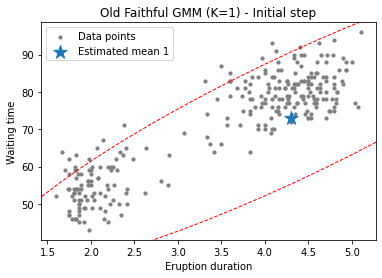

--- Initial step (K=1) ---
Estimated means:
 [[ 4.3 73. ]]
Estimated covariance matrices:
 [[[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]]
Estimated class probabilities:
 [1.]




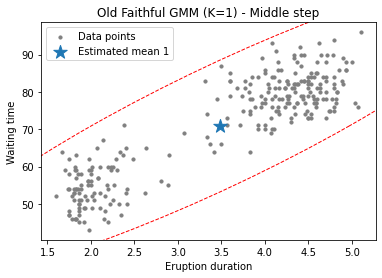

--- Middle step (K=1) ---
Estimated means:
 [[ 3.48778309 70.89705882]]
Estimated covariance matrices:
 [[[  1.29793889  13.92641885]
  [ 13.92641885 184.14381488]]]
Estimated class probabilities:
 [1.]




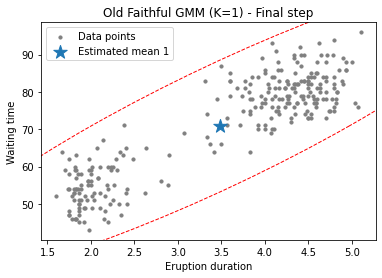

--- Final step (K=1) ---
Estimated means:
 [[ 3.48778309 70.89705882]]
Estimated covariance matrices:
 [[[  1.29793889  13.92641885]
  [ 13.92641885 184.14381488]]]
Estimated class probabilities:
 [1.]




In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# The previous functions gmm_em, plot_cov_ellipse, and e_step, m_step should be defined here.

def plot_gmm_progression(data, K, means, covariances, class_probs, step_name):
    fig, ax = plt.subplots()
    ax.scatter(data[:, 0], data[:, 1], s=10, c='gray', label='Data points')

    for i in range(K):
        ax.scatter(means[i, 0], means[i, 1], marker='*', s=200, label=f'Estimated mean {i + 1}')
        plot_cov_ellipse(means[i], covariances[i], ax, edgecolor='red', linestyle='dashed')

    ax.legend()
    ax.set_xlabel('Eruption duration')
    ax.set_ylabel('Waiting time')
    ax.set_title(f'Old Faithful GMM (K={K}) - {step_name} step')

    plt.show()

    print(f'--- {step_name} step (K={K}) ---')
    print("Estimated means:\n", means)
    print("Estimated covariance matrices:\n", covariances)
    print("Estimated class probabilities:\n", class_probs)
    print("\n")

# Load the Old Faithful dataset
data = np.loadtxt('C:/Users/77942/Desktop/2023 spring/491/faithful.txt')

for K in [1]:
    # Initial parameters
    means, covariances, class_probs = initialize_gmm(data, K)

    # First step (E-step)
    responsibilities = e_step(data, means, covariances, class_probs, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Initial')

    # Middle step
    for _ in range(10):  # Perform 10 iterations before the middle step
        responsibilities = e_step(data, means, covariances, class_probs, K)
        means, covariances, class_probs = m_step(data, responsibilities, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Middle')

    # Final step
    means, covariances, class_probs = gmm_em(data, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Final')


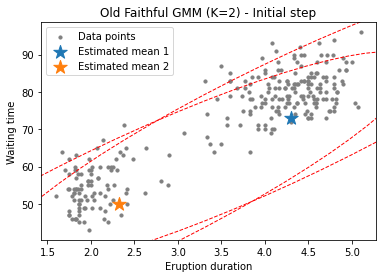

--- Initial step (K=2) ---
Estimated means:
 [[ 4.3   73.   ]
 [ 2.317 50.   ]]
Estimated covariance matrices:
 [[[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]

 [[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]]
Estimated class probabilities:
 [0.5 0.5]




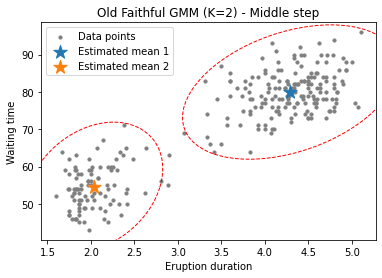

--- Middle step (K=2) ---
Estimated means:
 [[ 4.28967212 79.96823786]
 [ 2.03639992 54.47863175]]
Estimated covariance matrices:
 [[[ 0.16995556  0.94044554]
  [ 0.94044554 36.04436772]]

 [[ 0.06917678  0.43526267]
  [ 0.43526267 33.69793063]]]
Estimated class probabilities:
 [0.64412243 0.35587757]




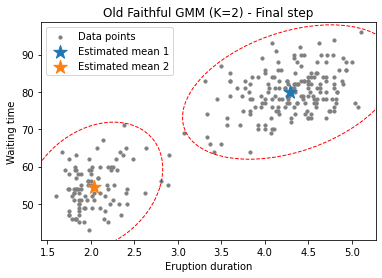

--- Final step (K=2) ---
Estimated means:
 [[ 4.28966211 79.96811689]
 [ 2.03638861 54.47851799]]
Estimated covariance matrices:
 [[[ 0.16996826  0.94060703]
  [ 0.94060703 36.04618559]]

 [[ 0.0691678   0.43516895]
  [ 0.43516895 33.69729111]]]
Estimated class probabilities:
 [0.64412708 0.35587292]




In [73]:
for K in [2]:
    # Initial parameters
    means, covariances, class_probs = initialize_gmm(data, K)

    # First step (E-step)
    responsibilities = e_step(data, means, covariances, class_probs, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Initial')

    # Middle step
    for _ in range(10):  # Perform 10 iterations before the middle step
        responsibilities = e_step(data, means, covariances, class_probs, K)
        means, covariances, class_probs = m_step(data, responsibilities, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Middle')

    # Final step
    means, covariances, class_probs = gmm_em(data, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Final')

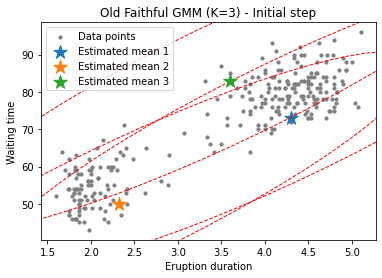

--- Initial step (K=3) ---
Estimated means:
 [[ 4.3   73.   ]
 [ 2.317 50.   ]
 [ 3.6   83.   ]]
Estimated covariance matrices:
 [[[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]

 [[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]

 [[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]]
Estimated class probabilities:
 [0.33333333 0.33333333 0.33333333]




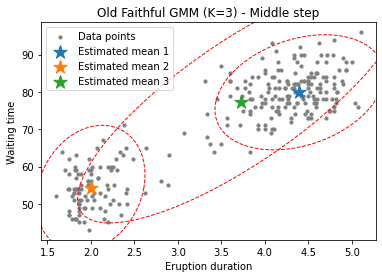

--- Middle step (K=3) ---
Estimated means:
 [[ 4.39649461 79.89745377]
 [ 1.99550867 54.12633792]
 [ 3.72391595 77.30523974]]
Estimated covariance matrices:
 [[[1.04702915e-01 5.05514865e-01]
  [5.05514865e-01 2.64708966e+01]]

 [[4.35526285e-02 2.52078533e-01]
  [2.52078533e-01 3.18215537e+01]]

 [[3.92206388e-01 5.44169780e+00]
  [5.44169780e+00 1.16951524e+02]]]
Estimated class probabilities:
 [0.50432339 0.33286715 0.16280946]




In [75]:
for K in [3]:
    # Initial parameters
    means, covariances, class_probs = initialize_gmm(data, K)

    # First step (E-step)
    responsibilities = e_step(data, means, covariances, class_probs, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Initial')

    # Middle step
    for _ in range(10):  # Perform 10 iterations before the middle step
        responsibilities = e_step(data, means, covariances, class_probs, K)
        means, covariances, class_probs = m_step(data, responsibilities, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Middle')



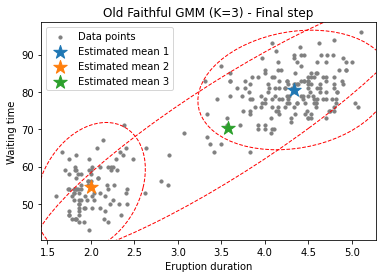

--- Final step (K=3) ---
Estimated means:
 [[ 4.33543887 80.52276504]
 [ 1.99669939 54.38212224]
 [ 3.5737091  70.34441189]]
Estimated covariance matrices:
 [[[1.35839157e-01 3.55543726e-01]
  [3.55543726e-01 2.85465700e+01]]

 [[4.39189351e-02 3.43913658e-01]
  [3.43913658e-01 3.37411127e+01]]

 [[5.53322613e-01 7.84654368e+00]
  [7.84654368e+00 1.34903989e+02]]]
Estimated class probabilities:
 [0.57627668 0.33284076 0.09088256]




In [76]:
    # Final step
    means, covariances, class_probs = gmm_em(data, K)
    plot_gmm_progression(data, K, means, covariances, class_probs, 'Final')